In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import normalize, robust_scale, scale

### robust_scale

In [2]:
MovieData1 = pd.read_csv('moviedata_final4.csv')
movie1 = robust_scale(MovieData1[["director_score","act_score","pre_score","viewer_num","like_see", "screen1"]])
comp_score = MovieData1[["comp_score"]]
#comp_score

result = pd.DataFrame(np.vstack(movie1),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1"])
data1 = pd.DataFrame(np.hstack([result, comp_score]),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1","comp_score"])
data1.head()

,director_score,act_score,pre_score,viewer_num,like_see,screen1,comp_score
0,178.0,16.833333,0.061856,7.385650,5.082541,3.887372,1.0
1,190.0,15.033333,0.123711,5.390135,4.757322,3.109215,1.0
2,174.0,15.800000,0.185567,2.946188,3.680107,3.197952,1.0
3,316.0,19.600000,-0.108247,3.964126,7.823887,4.245734,1.0
4,88.0,13.200000,0.247423,3.201794,17.730696,4.259386,1.0


In [3]:
dfy = MovieData1.week1_pop
dfX1 = data1[["director_score","act_score","viewer_num","like_see", "screen1","comp_score","pre_score"]]

dfX = sm.add_constant(dfX1)
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              week1_pop   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 22 Dec 2016   Prob (F-statistic):          3.15e-147
Time:                        01:41:56   Log-Likelihood:                -6468.8
No. Observations:                 457   AIC:                         1.295e+04
Df Residuals:                     449   BIC:                         1.299e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.493e+04   1.99e+04     -2.

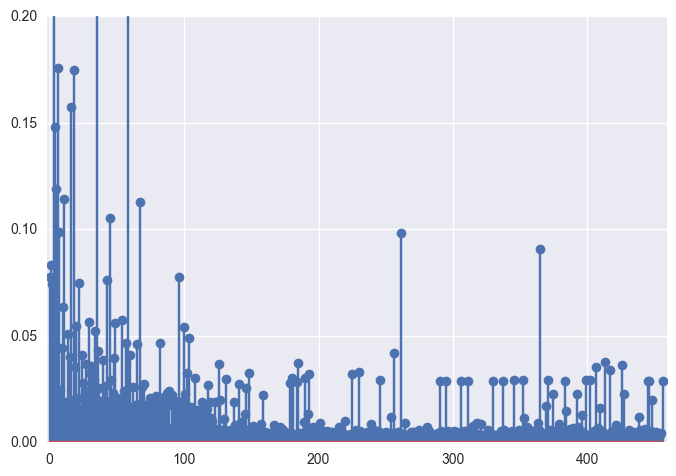

hat.sum() = 8.0


In [4]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.stem(hat)
plt.axis([ -2, len(dfy)+2, 0, 0.2 ])
plt.show()
print("hat.sum() =", hat.sum())

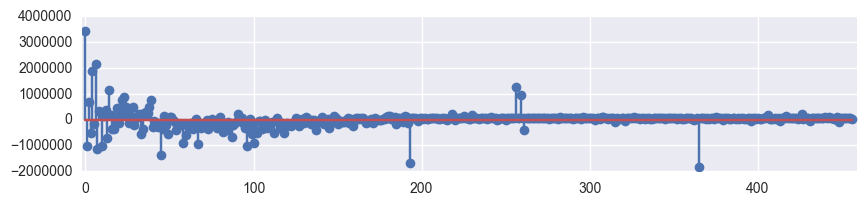

In [5]:
plt.figure(figsize=(10,2))
plt.stem(result.resid)
plt.xlim([-2, len(dfy)+2])
plt.show()

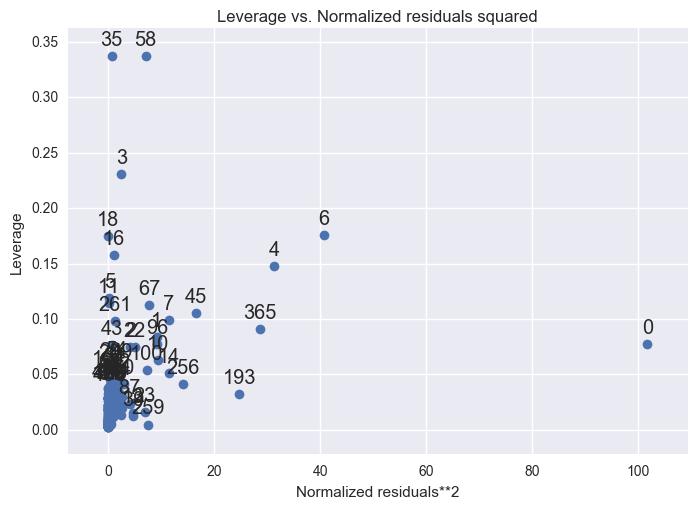

In [6]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

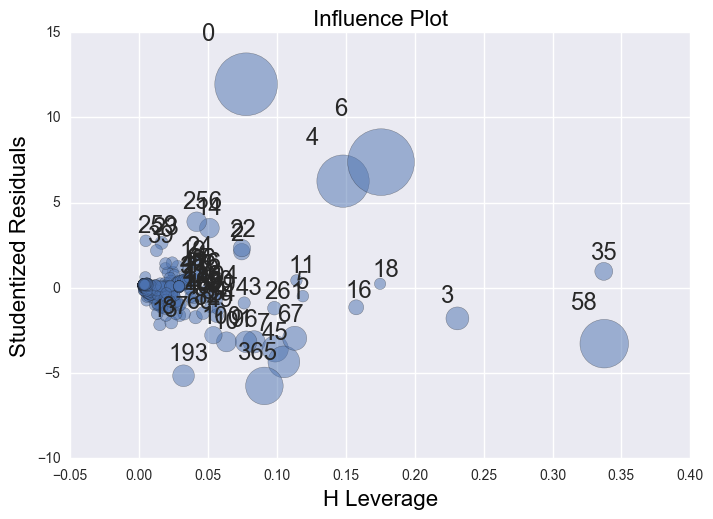

In [7]:
sm.graphics.influence_plot(result, plot_alpha=0.5)
plt.show()

removing 0, 35, 58

In [83]:
MovieData2 = pd.read_csv('moviedata_final4_1.csv')
movie2 = robust_scale(MovieData2[["director_score","act_score","pre_score","viewer_num","like_see", "screen1"]])
comp_score = MovieData2[["comp_score","week1_pop"]]

result2 = pd.DataFrame(np.vstack(movie2),columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1"])
#result2
data2 = pd.DataFrame(np.hstack([result2, comp_score]), columns=["director_score","act_score","pre_score","viewer_num","like_see", "screen1","comp_score","week1_pop"])
#data2.head()



dfy = data2[["week1_pop"]]
dfX1 = data2[["director_score","act_score","viewer_num","like_see", "screen1","comp_score"]]

dfX = sm.add_constant(dfX1)
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              week1_pop   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     313.7
Date:                Thu, 22 Dec 2016   Prob (F-statistic):          1.01e-156
Time:                        02:43:54   Log-Likelihood:                -6365.1
No. Observations:                 454   AIC:                         1.274e+04
Df Residuals:                     447   BIC:                         1.277e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.602e+04   1.64e+04     -2.

In [84]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX,dfy,test_size=0.25, random_state=1)

In [85]:
#X_train.head()
#y_train.head()
#X_test.head()
y_test.head()

,week1_pop
67,287918.0
146,6695.0
377,415.0
249,1186.0
418,119.0


In [86]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

TypeError: Could not compare ['pinv'] with block values